In [29]:
# Dependencies

import pandas as pd
from pathlib import Path
import requests
from pprint import pprint
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import re
import math

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")


In [6]:
# Store filepath in a variable
file_one = Path("Resources/us_counties_covid19_daily.csv")
#file_two = Path("Resources/county_info.csv")

In [7]:
# Read our data file with the Pandas library
covid_df = pd.read_csv(file_one, encoding="ISO-8859-1")
#county_df =pd.read_csv(file_two, encoding="ISO-8859-1")

In [8]:
# Show the first five rows.
covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [9]:
# Select rows in my date range
# Make a start date
start_date = '2020-09-01'

# Make an end date
end_date = '2020-11-30'

# Select DataFrame rows between two dates
mask = (covid_df['date'] > start_date) & (covid_df['date'] <= end_date)
fall_covid_df = covid_df.loc[mask]

fall_covid_df

,date,county,state,fips,cases,deaths
492429,2020-09-02,Autauga,Alabama,1001.0,1452,24.0
492430,2020-09-02,Baldwin,Alabama,1003.0,4583,42.0
492431,2020-09-02,Barbour,Alabama,1005.0,768,7.0
492432,2020-09-02,Bibb,Alabama,1007.0,562,8.0
492433,2020-09-02,Blount,Alabama,1009.0,1308,11.0
...,...,...,...,...,...,...
784205,2020-11-30,Sweetwater,Wyoming,56037.0,1888,6.0
784206,2020-11-30,Teton,Wyoming,56039.0,1644,2.0
784207,2020-11-30,Uinta,Wyoming,56041.0,1070,4.0
784208,2020-11-30,Washakie,Wyoming,56043.0,440,8.0


In [10]:
# Add the weather column and city to out DataFrame
#fall_covid_df['Temperature (C)'] = ''
#fall_covid_df['City'] = ''
#fall_covid_df

In [11]:
df = fall_covid_df.groupby(by=['date']).mean()
df

,fips,cases,deaths
date,,,
2020-09-02,31468.868873,1892.995671,58.820976
2020-09-03,31468.868873,1907.931333,59.181300
2020-09-04,31468.868873,1923.452690,59.473067
2020-09-05,31468.868873,1936.518244,59.698669
2020-09-06,31468.868873,1946.998453,59.866836
...,...,...,...
2020-11-26,31476.539633,3989.628580,83.097507
2020-11-27,31476.539633,4055.404006,83.595832
2020-11-28,31476.539633,4100.748922,83.945707


In [12]:
df = df.reset_index()

In [49]:
x = [i for i in range(1,91)]
y = df['cases']
fit = np.polyfit(x, np.log(y), 1)
one =round(fit[0],2)
two = round(math.exp(fit[1]), 2)
line_eq = f"y = {two} * e ^ {one} x"
line = [two * (math.exp(one * i)) for i in x]

[0.00863166 7.47813791]
[1786.718142561868, 1804.6749584269294, 1822.8122432917344, 1841.1318108998832, 1859.6354932234042, 1878.3251406459485, 1897.2026221478338, 1916.2698254929414, 1935.528657417495, 1954.9810438207364, 1974.6289299575158, 1994.4742806328209, 2014.5190803982564, 2034.7653337505037, 2055.215065331769, 2075.870320132253, 2096.7331636946474, 2117.805682320695, 2139.0899832798186, 2160.588195019851, 2182.3024673798814, 2204.2349718052415, 2226.3879015646507, 2248.7634719695457, 2271.3639205956133, 2294.1915075065504, 2317.2485154800706, 2340.5372502361856, 2364.0600406677786, 2387.8192390734953, 2411.8172213929747, 2436.0563874444483, 2460.5391611647196, 2485.267990851564, 2510.2453494085566, 2535.473734592368, 2560.9556692625415, 2586.693701633777, 2612.690405530762, 2638.9483806455487, 2665.4702527975314, 2692.258674196026, 2719.3163237054973, 2746.6459071134427, 2774.2501574009793, 2802.1318350161387, 2830.293728149917, 2858.738653015097, 2887.469454127868, 2916.4890

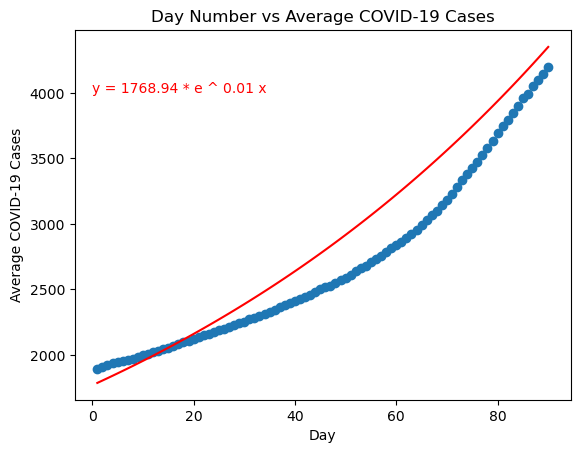

In [50]:
plt.scatter([i for i in range(1,91)], df['cases'])
plt.plot(x,line, color='red')
plt.annotate(line_eq, (0, 4000), color='red')
plt.xlabel('Day')
plt.ylabel('Average COVID-19 Cases')
plt.title('Day Number vs Average COVID-19 Cases')
plt.show()

[0.00863166 7.47813791]
y = 1.01 * 1768.94 ^ x
